<a href="https://colab.research.google.com/github/Wilson77Calixto/Aprender-praticando-Python/blob/master/Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisando um conjunto de dados usando complete-linkage

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.rcParams['figure.figsize']=(15,10)

In [7]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/shopping-data.csv'

In [8]:
shopping = pd.read_csv(url)
shopping.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
shopping_2d = shopping[['Annual Income (k$)', 'Spending Score (1-100)']]
shopping_2d.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


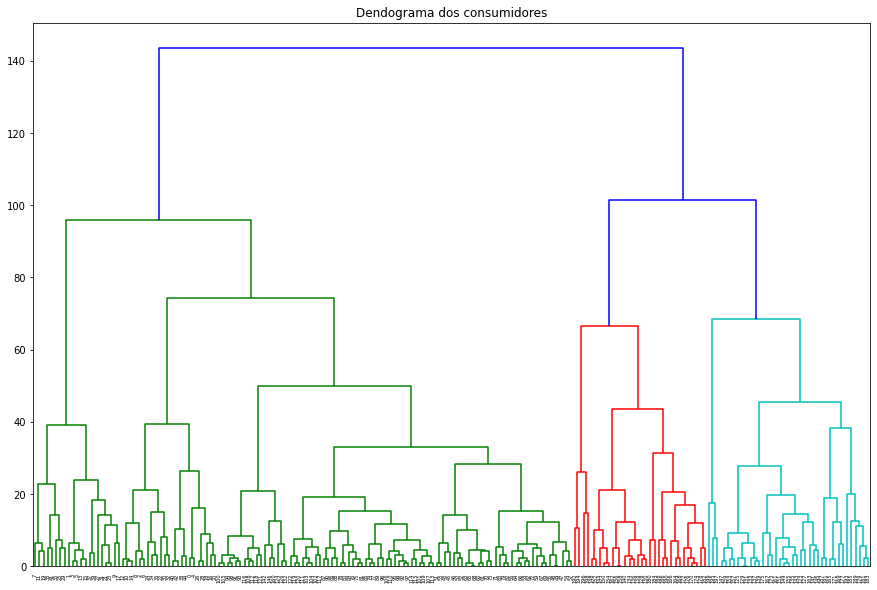

In [14]:
plt.title('Dendograma dos consumidores')
dendograma = shc.dendrogram(shc.linkage(shopping_2d, method='complete'))

In [17]:
n_grupos = 5
grupos = AgglomerativeClustering(n_clusters=n_grupos, affinity='euclidean', linkage='complete')
grupos.fit_predict(shopping_2d)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

<function matplotlib.pyplot.show>

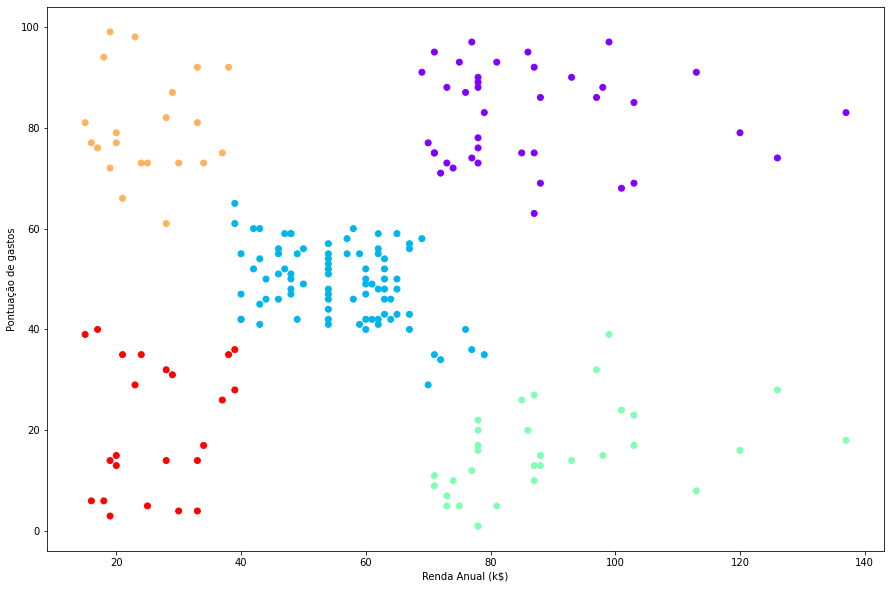

In [20]:
plt.scatter(shopping_2d['Annual Income (k$)'], shopping_2d['Spending Score (1-100)'], c=grupos.labels_, cmap='rainbow')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de gastos')
plt.show

<function matplotlib.pyplot.show>

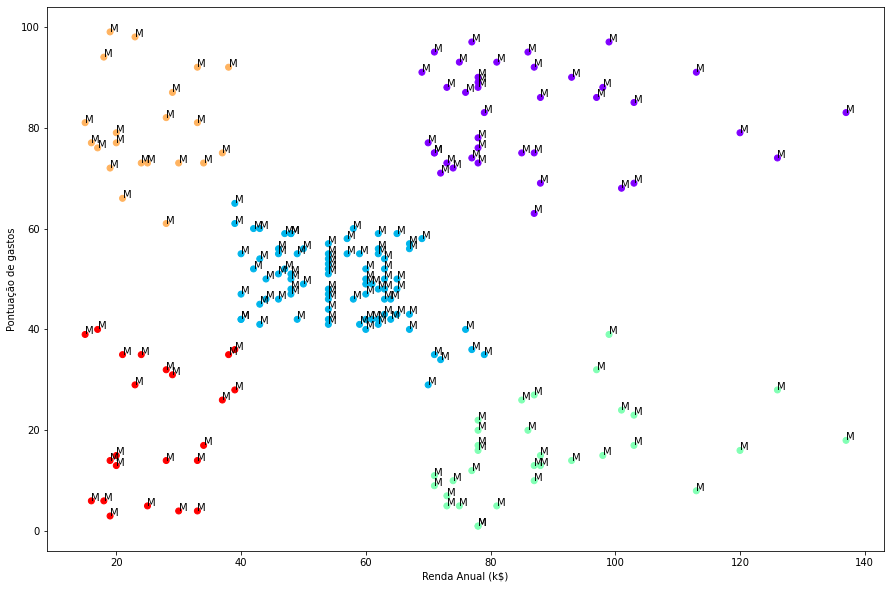

In [23]:
fig, eixo = plt.subplots()

plt.scatter(shopping_2d['Annual Income (k$)'], shopping_2d['Spending Score (1-100)'], c=grupos.labels_, cmap='rainbow')
eixo.set_xlabel('Renda Anual (k$)')
eixo.set_ylabel('Pontuação de gastos')

for i, texto in enumerate(shopping['Genre']):
  if texto == 'Fenale':
    eixo.annotate('F', (shopping.iloc[i]['Annual Income (k$)'], shopping.iloc[i]['Spending Score (1-100)']))
  else:
    eixo.annotate('M', (shopping.iloc[i]['Annual Income (k$)'], shopping.iloc[i]['Spending Score (1-100)'])) 

plt.show